In [333]:
"""This program takes input crater image data for the Moon and an unknown body and estimates
crater depth and diameter via simple image analysis. The code reads in the data into dataframes,
before defining a set of functions to calculate shadow length within each crater, and from that,
estimate crater depth, in addition to estimating crater diameter. The code uses a general unit test
to then validate that the functions, defined as above, are performing their intended role correctly.
The code uses the apply method to pass each row of the dataframes, storing data for the Moon and
unknown body, as an array to the functions described above, appending their output as columns of the
dataframes. The code then estimates the error in the estimated values of crater depth and diameter on
the Moon using a set of validated measurements imported from the Moon2.csv dataset. The error in these
estimated measurements for the unknown body is then inferred from the error in the estimated values for
the Moon. Finally, a series of data plots and statistical analyses are performed on the datasets for
both the Moon and the unknown body. 
"""

'This program takes input crater image data for the Moon and an unknown body and estimates\ncrater depth and diameter via simple image analysis. The code reads in the data into dataframes,\nbefore defining a set of functions to calculate shadow length within each crater, and from that,\nestimate crater depth, in addition to estimating crater diameter. The code uses a general unit test\nto then validate that the functions, defined as above, are performing their intended role correctly.\nThe code uses the apply method to pass each row of the dataframes, storing data for the Moon and\nunknown body, as an array to the functions described above, appending their output as columns of the\ndataframes. The code then estimates the error in the estimated values of crater depth and diameter on\nthe Moon using a set of validated measurements imported from the Moon2.csv dataset. The error in these\nestimated measurements for the unknown body is then inferred from the error in the estimated values fo

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from inspect import signature
#Imports the necessary modules and abbreviates them 

# Data Initialisation

In [265]:
datamoon1 = pd.read_csv('Moon1.csv')
datamoon2 = pd.read_csv('Moon2.csv')
databody1 = pd.read_csv('Body1.csv') 
#Imports the comma-separated data files as dataframes using the pandas module and assigns them to variables

In [266]:
def shadow(array, scale_factor): 
    #Defines a function to calculate shadow length in metres, takes an array (a row of the dataframe) and a scale factor (the pixel to metre ratio for images of each body) as its arguments 
    ydiameter = array[3]
    xdiameter = array[2]
    shadow_pixels = array[1] 
    #Sets the value of the crater dimensions and shadow length to elements of the array passed to the function
    if ydiameter > xdiameter: 
        #If the y diameter is greater than the x diameter, the shadow is scaled up to match the y diameter to remove image squashing due to the curvature of the spherical body's surface
        shadow_metres = (ydiameter/xdiameter)*shadow_pixels*scale_factor
    else:
        shadow_metres = shadow_pixels*scale_factor 
        #Shadow length in metres is calculated by multiplying shadow length in pixels by the pixel to metres conversion factor
    return(shadow_metres) 
    #function returns shadow length in metres

In [334]:
def diameter(array, scale_factor): 
    #Defines a function to calculate crater diameter in metres, takes an array (a row of the dataframe) and a scale factor (the pixel to metre ratio for images of each body) as its arguments  
    ydiameter = array[3]
    xdiameter = array[2]
    diameter = max(xdiameter, ydiameter)*scale_factor 
    #Sets the diameter in metres to the largest of the 2 diameter measurements, multiplied by the pixel to metres conversion factor
    return(diameter) 
    #function returns crater diameter in metres

In [268]:
def depth(array): 
    #Defines a function to calculate crater depth in metres, takes an array (a row of the dataframe) as its argument
    shadow_length = array[4] 
    #Sets shadow length to the value in metres which has already been calculated for this row 
    theta = array[0] 
    #Sets theta to the first element of the array
    depth = shadow_length*np.tan(np.pi*(theta/180)) 
    #Calculates depth by multiplying shadow length in metres by tan(theta) where theta has been converted from degrees to radians
    return(depth) 
    #function returns crater depth in metres

In [269]:
def num_bins(data): 
    #Defines a function to calculate optimum number of bins for a histogram using the Freedman–Diaconis formula
    q25, q75 = np.percentile(data,[25,75]) 
    #Takes the 25th and 75th percentiles of the dataset
    bin_width = 2*(q75 - q25)*len(data)**(-1/3) 
    #Calculates optimum bin width using the formula width = (2(75th percentile - 25th percentile))/(no. datapoints^(1/3))
    bins = int(round((data.max() - data.min())/bin_width)) 
    #Calculates number of bins by dividing data range by bin width and rounding to the nearest integer
    return(bins) 
    #function returns optimum number of bins

In [270]:
def trimean(array): 
    #Defines a function to calculate the trimean of a dataset
    trimean = (np.percentile(array, 25) + 2*np.percentile(array, 50) + np.percentile(array, 75)) / 4
    #Calculates trimean using the formula (25th percentile + 2*50th percentile + 75th percentile)/4
    return(trimean) 
    #function returns trimean of dataset

In [271]:
def MAD(array): 
    #Defines a function to calculate the median absolute deviation of a dataset
    median = np.median(array) 
    #Takes the median of the dataset
    data = np.zeros(len(array)) 
    #Creates an array of the same length as the dataset
    for i in range(len(data)): 
        data[i] = abs(array[i] - median)
        #Iterates through the dataset taking the magnitude of each datapoint - the median and assigning it to the array of zeros
    MAD = np.median(data) 
    #Takes the median of the array of the absolute deviations from the median
    return(MAD) 
    #function returns the median absolute deviation

In [272]:
def array_location(array): 
    #Defines a function to calculate 3 measures of central tendency for a dataset
    Mean = np.mean(array)
    Median = np.median(array)
    Trimean = trimean(array)
    return (Mean, Median, Trimean) 
    #function returns an array of the mean, median and trimean for the dataset

In [273]:
def array_spread(array): 
    #Defines a function to calculate 3 measures of spread for a dataset
    SD = np.std(array)
    IQR = ss.iqr(array)
    median = np.median(array)
    Median_absolute_deviation = MAD(array)
    return (SD, IQR, Median_absolute_deviation) 
    #function returns an array of the standard deviation, interquartile range and median absolute deviation for the dataset

In [335]:
def asymmetric_error(array):
    #Defines a function to generate asymmetric (one-sided) errors for the half error bars of the first visualisation
    lower_error = np.zeros(len(array))
    upper_error = np.zeros(len(array))
    #Creates arrays to hold the lower and upper bound errors
    for i in range(len(array)): 
        #iterates through input array of errors
        if array[i] > 0:
            lower_error[i] = 0
            upper_error[i] = array[i]
            #if error is positive, lower bound error is set to 0 and upper bound error is set to the error value
        else:
            lower_error[i] = array[i]
            upper_error[i] = 0
            #if error is 0 or negative, upper bound error is set to 0 and lower bound error is set to the error value
    asymmetric_error = [lower_error, upper_error]
    #Creates list containing arrays of lower bound and upper bound arrays
    return(asymmetric_error)
    #returns list

## Function testing

In [338]:
def test(test_function, test_array, known_answer): 
    #Defines a function to test one of the previously defined functions, using a test data array and the known desired output for the data from the function to be tested
    sig = signature(test_function)
    params = sig.parameters
    #Creates an object holding the parameters of the test function
    num_params = len(params)
    #Finds the number of parameters to be passed to the test function 
    if num_params == 2: 
        #Tests if a parameter must be passed to the function, in addition to the array, ie the pixel scaling factor     
        calculated_answer = test_function(test_array, 1) 
        #returns calculated output as the output of the function to be tested when passed the test input data (and a pixel scaling factor of 1)
    else:
        calculated_answer = test_function(test_array) 
        #returns calculated output as the output of the function to be tested when passed the test input data
    if type(known_answer) == list:
        #Tests if the test function outputs a list
        error = 0
        for i in range(len(known_answer)):
            for j in range(len(known_answer[i])):
                #Iterates through each subelement of each element of the list outputted by the test function
                dummy = abs(calculated_answer[i][j] - known_answer[i][j])
                if dummy > error:
                    error = dummy
                    #If the difference between a value of the calculated output list and the known output list is the largest error found thus far, the error is set to this value
                    #Error is set to largest single error between a value of the calculated output list and the known output list
    elif type(known_answer) == float or int:
        #Tests if the test function outputs a float or int (ie a single value)
        error = abs(calculated_answer - known_answer) 
        #takes the magnitude of the difference between the calculated output and the desired output as the error
    if error<1e-5: 
        #If the error is less than 0.00001, the test is taken to be successful 
        print(f'Test was successful, known output was {known_answer} and calculated output was {calculated_answer}')
    else: 
        #Otherwise, the test is taken to be a failure 
        print(f'Test was a failure, known output was {known_answer} and calculated output was {calculated_answer}')
        #In both cases, a string prints showing the outcome of the test and the desired and calculated outputs

In [339]:
#Sets 4 test arrays of data 
test_array1 = np.linspace(1, 4, 4) #[1, 2, 3, 4] [theta, shadow_pixels, xdiameter, ydiameter] ydiameter(4) > xdiameter(3)
test_array2 = np.linspace(4, 1 ,4) #[4, 3, 2, 1] [theta, shadow_pixels, xdiameter, ydiameter] ydiameter(3) < xdiameter(4)
test_array3 = np.linspace(1, 5, 5) #[1, 2, 3, 4, 5] [theta, shadow_pixels, xdiameter, ydiameter, shadow_length]
test_array4 = np.linspace(-2, 2, 5) #[-2, -1, 0, 1, 2] array of positive and negative values for half error bars for the first plot

### Shadow length test

In [340]:
known_answer1 = (4/3)*2*1
known_answer2 = 3 * 1
#Sets up desired outputs for the shadow function on the first and second test arrays

In [341]:
test(shadow, test_array1, known_answer1) 
#Tests the shadow function in the case where y diameter > x diameter so the shadow length is scaled up accordingly 

Test was successful, known output was 2.6666666666666665 and calculated output was 2.6666666666666665


In [279]:
test(shadow, test_array2, known_answer2)
#Tests the shadow function in the case where y diameter < x diameter

Test was successful, known output was 3 and calculated output was 3.0


### Diameter test

In [280]:
known_answer3 = 4 * 1 
#Sets up the desired output for the diameter function on the first test array

In [281]:
test(diameter, test_array1, known_answer3) 
#Tests the diameter function 

Test was successful, known output was 4 and calculated output was 4.0


### Depth test

In [282]:
known_answer4 = 0.08727532464 #5 * tan(1*pi/180), sets up the desired output for the depth function on the third test array
test(depth, test_array3, known_answer4) #tests the depth function

Test was successful, known output was 0.08727532464 and calculated output was 0.08727532464108792


### Number of bins test

In [342]:
known_answer5 = 2  #2*(4-2)/(4*5^(-1/3)) = 5^(1/3) which rounds to the nearest integer to 2, sets up the desired output for the num_bins function on the third test array
test(num_bins, test_array3, known_answer5) #tests the num_bins function

Test was successful, known output was 2 and calculated output was 2


### Trimean test

In [284]:
known_answer6 = (2+2*3+4)/4 #sets up the desired output for the trimean function on the third test array
test(trimean, test_array3, known_answer6) #tests the trimean function 

Test was successful, known output was 3.0 and calculated output was 3.0


### MAD test

In [285]:
known_answer7 = 1 #Using test_array3, median = 3, array of modulus of data minus median = [2, 1, 0, 1, 2], median of this array = 1, sets up the desired output for the median absolute deviation function on the third array
test(MAD, test_array3, known_answer7) #tests the median absolute deviation function

Test was successful, known output was 1 and calculated output was 1.0


### Asymmetric Error test

In [286]:
known_lower_error = [-2, -1, 0, 0, 0] #Using test_array4, lower error values are the same as the test array if test array values are negative and zero if positive
known_upper_error = [0, 0, 0, 1, 2] #Upper error values are the same as the test array if test array values are positive and zero if negative
known_answer8 = [known_lower_error, known_upper_error] #Known output is a list containing the 2 arrays
test(asymmetric_error, test_array4, known_answer8) #Tests the asymmetric error function

Test was successful, known output was [[-2, -1, 0, 0, 0], [0, 0, 0, 1, 2]] and calculated output was [array([-2., -1.,  0.,  0.,  0.]), array([0., 0., 0., 1., 2.])]


## Data Analysis

In [287]:
datamoon1['Shadow (Metres)'] = datamoon1.apply(shadow, axis=1, raw=True, result_type='expand', args=[1628])
#Assigns a new column to the dataframe for the first Moon dataset containing the shadow lengths in metres. Apply method applies a function to a dataframe by passing each row successively as an array to the function. Setting axis to 1 applies the function to each row (rather than column). Setting raw to true means the function is passed each row as an array rather than a series. Setting result type to expand means the list of outputs of the function on each row is converted back into a column of the dataframe. The args list passes 1628 as an additional argument to the function shadow, the pixel to metres scaling factor, 1628 for the Moon. The apply method is passed the function shadow as its first argument so the column 'Shadow (Metres)' is populated with the output of the shadow function on each row of the dataframe in turn 

In [288]:
datamoon1['Diameter (Metres)'] = datamoon1.apply(diameter, axis=1, raw=True, result_type='expand', args=[1628])
#Assigns a new column to the dataframe for the first Moon dataset containing the crater diameters by passing the apply method the diameter function and pixel to metre scaling factor, 1628

In [289]:
datamoon1['Depth (Metres)'] = datamoon1.apply(depth, axis=1, raw=True, result_type='expand')
#Assigns a new column to the dataframe for the first Moon dataset containing the crater depths by passing the apply method the depth function

In [290]:
datamoon1['Real Diameter (Metres)'] = datamoon2[' Real diameter (km)']*1000
#Assigns a new column to the dataframe for the first Moon dataset containing the actual crater diameters using the validated measurements from the second Moon dataset, converting from km to m

In [291]:
datamoon1['Real Depth (Metres)'] = datamoon2[' Real Depth (km)']*1000
#Assigns a new column to the dataframe for the first Moon dataset containing the actual crater depths using the validated measurements from the second Moon dataset, converting from km to m

In [292]:
datamoon1['Depth Error (Metres)'] = datamoon1['Real Depth (Metres)'] - datamoon1['Depth (Metres)']
#Assigns a new column to the dataframe for the first Moon dataset containing error in the calculated values for the crater depths by finding the difference between the validated and calculated measurements

In [293]:
datamoon1['Diameter Error (Metres)'] = datamoon1['Real Diameter (Metres)'] - datamoon1['Diameter (Metres)']
#Assigns a new column to the dataframe for the first Moon dataset containing error in the calculated values for the crater diameters by finding the difference between the validated and calculated measurements

In [294]:
datamoon1['Depth Error (%)'] = (abs(datamoon1['Depth Error (Metres)']) / datamoon1['Real Depth (Metres)'])*100
#Assigns a new column to the dataframe for the first Moon dataset containing % error in the calculated values for the crater depths by dividing the magnitude of the depth error by the validated measurement and multiplying by 100

In [295]:
datamoon1['Diameter Error (%)'] = (abs(datamoon1['Diameter Error (Metres)']) / datamoon1['Real Diameter (Metres)'])*100
#Assigns a new column to the dataframe for the first Moon dataset containing % error in the calculated values for the crater diameters by dividing the magnitude of the diameter error by the validated measurement and multiplying by 100

In [296]:
depth_error_std = np.std(datamoon1['Depth Error (%)']) 
#Calculates the standard deviation in the depth errors

In [297]:
diameter_error_std = np.std(datamoon1['Diameter Error (%)']) 
#Calculates the standard deviation in the diameter errors

In [298]:
databody1['Shadow (Metres)'] = databody1.apply(shadow, axis=1, raw=True, result_type='expand', args=[177])
#Assigns a new column to the dataframe for the unknown body dataset containing the shadow lengths by passing the apply method the shadow function and pixel to metre scaling factor, 177

In [299]:
databody1['Diameter (Metres)'] = databody1.apply(diameter, axis=1, raw=True, result_type='expand', args=[177])
#Assigns a new column to the dataframe for the unknown body dataset containing the crater diameters by passing the apply method the diameter function and pixel to metre scaling factor, 177

In [300]:
databody1['Depth (Metres)'] = databody1.apply(depth, axis=1, raw=True, result_type='expand')
#Assigns a new column to the dataframe for the unknown body dataset containing the crater depths by passing the apply method the depth function

In [301]:
databody1['Depth Error (Metres)'] = databody1['Depth (Metres)'] * ((2*depth_error_std)/100)
#Assigns a new column to the dataframe for the unknown body dataset containing the errors in the depth measurements by multiplying the calculated depth by 2 standard deviations in the % error of the calculated depth measurements for the Moon dataset / 100

In [302]:
databody1['Diameter Error (Metres)'] = databody1['Diameter (Metres)'] * ((2*diameter_error_std)/100)
#Assigns a new column to the dataframe for the unknown body dataset containing the errors in the diameter measurements by multiplying the calculated diameter by 2 standard deviations in the % error of the calculated diameter measurements for the Moon dataset / 100

# Data plots

## Depth vs Diameter

In [303]:
linreg1 = ss.linregress(datamoon1['Diameter (Metres)'], datamoon1['Depth (Metres)'])
#Takes the linear regression of calculated depth against calculated diameter for craters on the Moon
linreg2 = ss.linregress(databody1['Diameter (Metres)'], databody1['Depth (Metres)'])
#Takes the linear regression of calculated depth against calculated diameter for craters on the unknown body

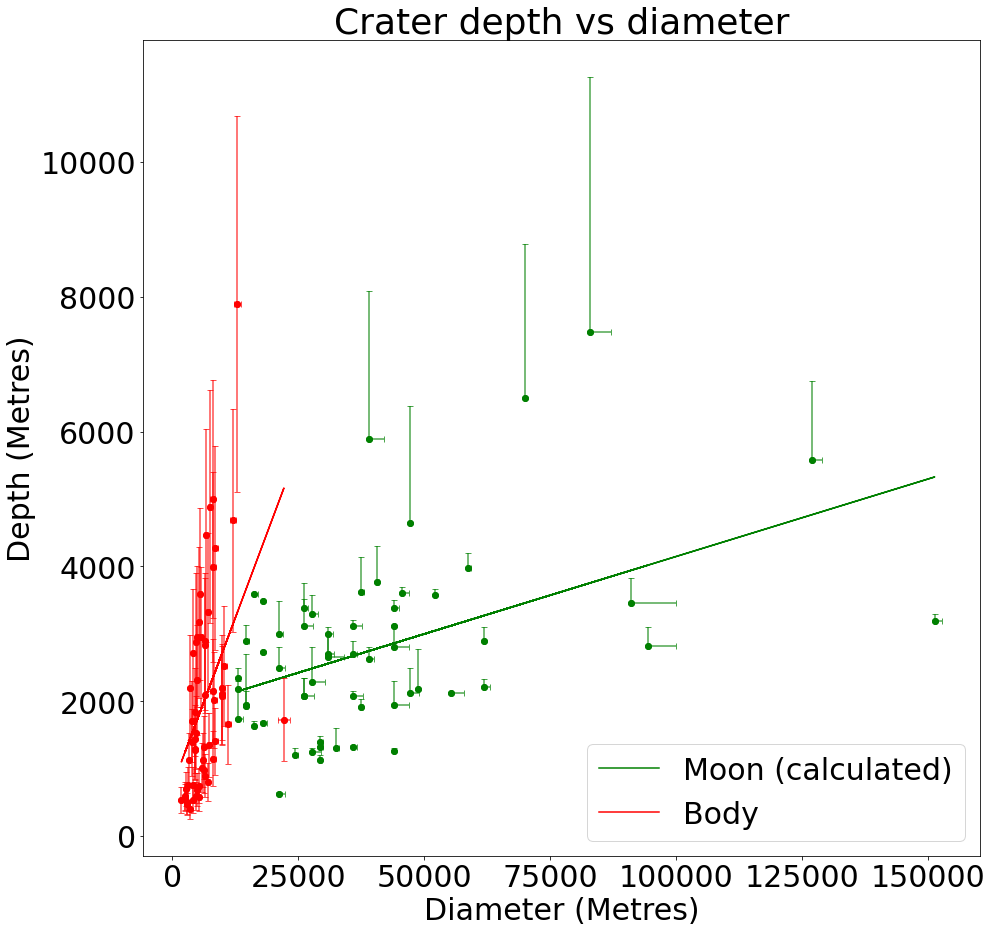

In [345]:
plt.figure(figsize = (15,15)) 
#Plots a figure of specified size
plt.scatter(datamoon1['Diameter (Metres)'], datamoon1['Depth (Metres)'], c = 'g')
#Plots a scatter graph of calculated depth against calculated diameter for craters on the Moon, of colour green
plt.scatter(databody1['Diameter (Metres)'], databody1['Depth (Metres)'], c = 'r')
#Plots a scatter graph of calculated depth against calculated diameter for craters on the unknown body, of colour red

plt.xlabel('Diameter (Metres)') 
#Sets the x axis label
plt.ylabel('Depth (Metres)') 
#Sets the y axis label 
plt.title('Crater depth vs diameter') 
#Sets the title 

plt.plot(datamoon1['Diameter (Metres)'], (linreg1[0]*datamoon1['Diameter (Metres)'] + linreg1[1]), c = 'g')
#Plots a line of best fit for calculated depth against calculated diameter for craters on the Moon
plt.plot(databody1['Diameter (Metres)'], (linreg2[0]*databody1['Diameter (Metres)'] + linreg2[1]), c = 'r')
#Plots a line of best fit for calculated depth against calculated diameter for craters on the unknown body

y_err1 = asymmetric_error(datamoon1['Depth Error (Metres)']) 
#Sets the one-sided error in y for the Moon craters
x_err1 = asymmetric_error(datamoon1['Diameter Error (Metres)']) 
#Sets the one-sided error in x for the Moon craters
y_err2 = databody1['Depth Error (Metres)']
#Sets the error in y for the unknown body craters
x_err2 = databody1['Diameter Error (Metres)']
#Sets the error in x for the unknown body craters

plt.errorbar(datamoon1['Diameter (Metres)'],datamoon1['Depth (Metres)'], xerr = x_err1, yerr=y_err1,fmt='o', ecolor = 'g', capsize=3,alpha=0.7, c = 'g')
#Plots x and y axis error bars for the Moon craters
plt.errorbar(databody1['Diameter (Metres)'],databody1['Depth (Metres)'], xerr = x_err2, yerr=y_err2,fmt='o', ecolor = 'r', capsize=3,alpha=0.7, c = 'r')
#Plots x and y axis error bars for the unknown body craters
#fmt = 'o' plots datapoints as circles, ecolor sets the colour of the error bars, capsize defines the size of error bar caps, alpha sets the extent of colour blending between plotted data

plt.legend(['Moon (calculated)', 'Body']) 
#Creates a legend, labelling the 2 plotted datasets

plt.rcParams.update({'font.size': 35}) 
#Changes font size to 35

## Error in depth estimation vs theta

In [305]:
linreg3 = ss.linregress(datamoon1['Theta'], datamoon1['Depth Error (%)'])
#Takes the linear regression of % error in calculated depth against angle of illumination for craters on the Moon

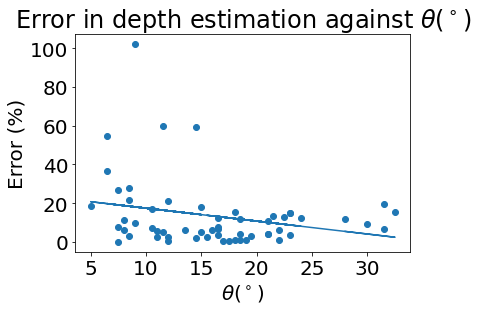

In [325]:
plt.figure()
plt.scatter(datamoon1['Theta'], datamoon1['Depth Error (%)']) 
#Plots % error in calculated depth against angle of illumination for craters on the Moon
plt.plot(datamoon1['Theta'], (linreg3[0]*datamoon1['Theta'] + linreg3[1])) 
#Plots a line of best fit for % error in calculated depth against angle of illumination for craters on the Moon
plt.xlabel(r'$\theta (^\circ)$') 
#Sets the x axis label
plt.ylabel('Error (%)') 
#Sets the y axis label 
plt.title(r'Error in depth estimation against $\theta(^\circ)$') 
#Sets the title 
plt.rcParams.update({'font.size': 15}) 
#Changes font size to 15

## Depth and diameter distributions

<Figure size 432x288 with 0 Axes>

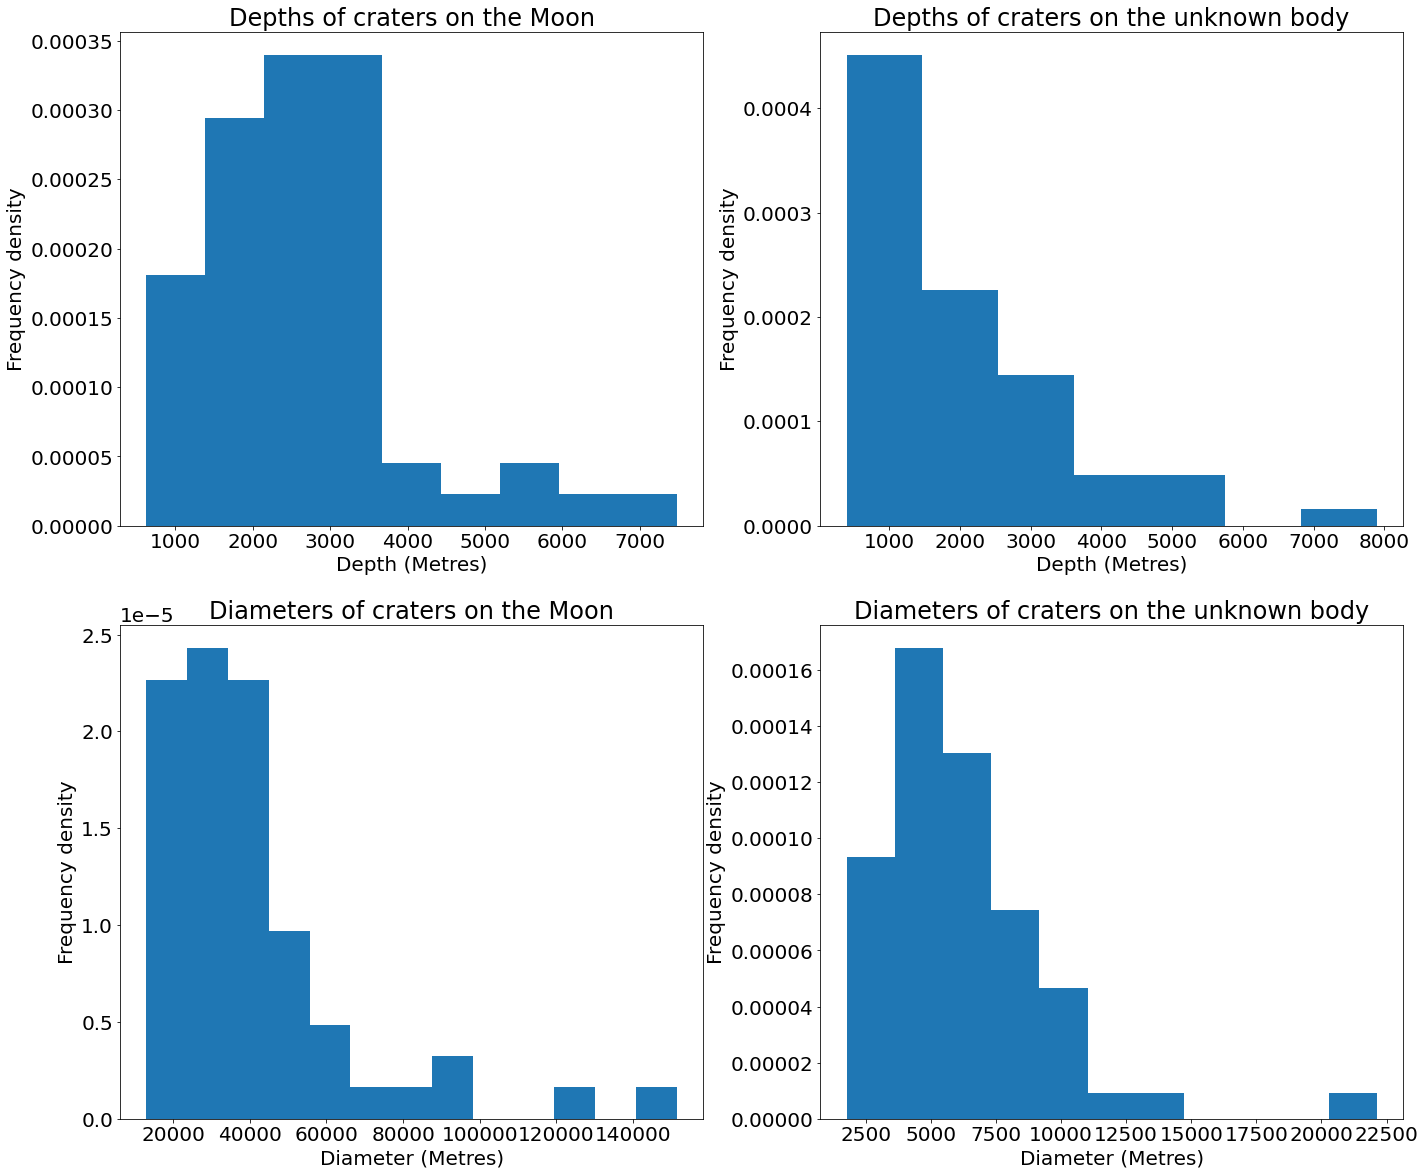

In [324]:
plt.figure()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (23,20)) 
#Sets up a 2 by 2 set of 4 subplots and specifies overall figure size
hplot1 = axes[0][0].hist(datamoon1['Depth (Metres)'], density=True, bins=num_bins(datamoon1['Depth (Metres)']))
#Sets the first subplot (top-left) to a histogram plot of calculate crater depths for the Moon using a number of bins as calculated using the num_bins function
hplot2 = axes[0][1].hist(databody1['Depth (Metres)'], density=True, bins=num_bins(databody1['Depth (Metres)']))
#Sets the second subplot (top-right) to a histogram plot of calculate crater depths for the unknown body using a number of bins as calculated using the num_bins function
hplot3 = axes[1][0].hist(datamoon1['Diameter (Metres)'], density=True, bins=num_bins(datamoon1['Diameter (Metres)']))
#Sets the third subplot (bottom-left) to a histogram plot of calculate crater diameters for the Moon using a number of bins as calculated using the num_bins function
hplot4 = axes[1][1].hist(databody1['Diameter (Metres)'], density=True, bins=num_bins(databody1['Diameter (Metres)']))
#Sets the fourth subplot (bottom-right) to a histogram plot of calculate crater diameters for the unknown body using a number of bins as calculated using the num_bins function

axes[0][0].set_ylabel('Frequency density')
axes[0][0].set_xlabel('Depth (Metres)')
axes[0][0].set_title('Depths of craters on the Moon')
#Sets the x axis and y axis labels and title for the first subplot (top-left)

axes[0][1].set_ylabel('Frequency density')
axes[0][1].set_xlabel('Depth (Metres)')
axes[0][1].set_title('Depths of craters on the unknown body')
#Sets the x axis and y axis labels and title for the second subplot (top-right)

axes[1][0].set_ylabel('Frequency density')
axes[1][0].set_xlabel('Diameter (Metres)')
axes[1][0].set_title('Diameters of craters on the Moon')
#Sets the x axis and y axis labels and title for the third subplot (bottom-left)

axes[1][1].set_ylabel('Frequency density')
axes[1][1].set_xlabel('Diameter (Metres)')
axes[1][1].set_title('Diameters of craters on the unknown body')
#Sets the x axis and y axis labels and title for the fourth subplot (bottom-right)
plt.rcParams.update({'font.size': 20}) 
#Changes font size to 20

# Statistical Analysis

## Measures of central tendency 

In [308]:
array_location(datamoon1['Depth (Metres)'])
#Calculates the mean, median and trimean for the calculated crater depths for the Moon

(2763.7774947611624, 2675.5327066769796, 2662.7871133299996)

In [309]:
array_location(databody1['Depth (Metres)'])
#Calculates the mean, median and trimean for the calculated crater depths for the unknown body

(1993.3738613590017, 1592.4989297958232, 1702.5576214992525)

In [310]:
array_location(datamoon1['Diameter (Metres)'])
#Calculates the mean, median and trimean for the calculated crater diameters for the Moon

(39829.862068965514, 34188.0, 34595.0)

In [311]:
array_location(databody1['Diameter (Metres)'])
#Calculates the mean, median and trimean for the calculated crater diameters for the unknown body

(6252.982758620689, 5575.5, 5785.6875)

## Measures of spread

In [312]:
array_spread(datamoon1['Depth (Metres)'])
#Calculates the standard deviation, interquartile range and median absolute deviation for the calculated crater depths for the Moon

(1298.241699901699, 1407.1833568239592, 714.5995735084128)

In [313]:
array_spread(databody1['Depth (Metres)'])
#Calculates the standard deviation, interquartile range and median absolute deviation for the calculated crater depths for the unknown body

(1456.5241183674025, 1975.4228546754089, 838.5643662885739)

In [314]:
array_spread(datamoon1['Diameter (Metres)'])
#Calculates the standard deviation, interquartile range and median absolute deviation for the calculated crater diameters for the Moon

(26344.918570072175, 20350.0, 10582.0)

In [315]:
array_spread(databody1['Diameter (Metres)'])
#Calculates the standard deviation, interquartile range and median absolute deviation for the calculated crater diameters for the unknown body

(3253.671795813946, 3672.75, 1593.0)

## Investigation of errors

In [316]:
array_location(datamoon1['Depth Error (%)'])
#Calculates the mean, median and trimean for the errors in the calculated crater depths for the Moon

(13.374695455120921, 7.359036027449307, 8.37991613263077)

In [317]:
array_location(datamoon1['Diameter Error (%)'])
#Calculates the mean, median and trimean for the errors in the calculated crater diameters for the Moon

(3.33274338938406, 2.3257142857142856, 2.7544390246520063)

In [318]:
array_spread(datamoon1['Depth Error (%)'])
#Calculates the standard deviation, interquartile range and median absolute deviation for the errors in the calculated crater depths for the Moon

(17.678034910463655, 11.643888355911708, 5.069936230995994)

In [319]:
array_spread(datamoon1['Diameter Error (%)'])
#Calculates the standard deviation, interquartile range and median absolute deviation for the errors in the calculated crater diameters for the Moon

(2.736039775509572, 4.269775803041522, 1.9543817527010805)

In [320]:
ss.pearsonr(datamoon1['Theta'], datamoon1['Depth Error (%)'])
#Calculates the pmcc for the linear correlation between angle of illumination and error in the calculated crater depths for the Moon. The first value given is the r value for the linear correlation and the second is the probability that a correlation of this strength could arise randomly for the number of datapoints of the dataset

(-0.2574899256022217, 0.05101689053044173)

In [321]:
ss.pearsonr(datamoon1['Depth (Metres)'], datamoon1['Depth Error (%)'])
#Calculates the pmcc for the linear correlation between calculated crater depth and error in the calculated crater depths for the Moon. The first value given is the r value for the linear correlation and the second is the probability that a correlation of this strength could arise randomly for the number of datapoints of the dataset

(0.6691940968572258, 9.328151297584905e-09)

In [322]:
datamoon1_sorted = datamoon1.sort_values('Depth (Metres)', ascending = True)
#Sorts rows of Moon crater dataframe by ascending values of the calculated crater depths

In [323]:
datamoon1_sorted['Depth Error (%)'].iloc[0:50].mean()
#Finds the mean percentage error in the calculated crater depths for the first 50 craters, arranged in order of ascending values of the calculated crater depths

8.77666122451377